In [208]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [209]:
def draw_line(slope=0, intercept=0, x=None, color='r'):
    if x is None:
        x1, x2, y1, y2 = plots.gca().axis()
    x = make_array(x1, x2)
    y = x*slope + intercept
    plots.plot(x, y, color=color)

In [210]:
def demographics_errors(slope, intercept):
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)

### Regression Line ###

In [211]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

In [212]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.show(5)

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3


In [213]:
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


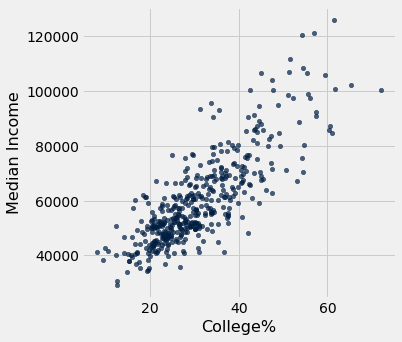

In [214]:
demographics.scatter('College%', 'Median Income')

In [215]:
correlation(demographics, 'College%', 'Median Income')

0.8184648517141335

In [216]:
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
print(regression_slope, regression_intercept)

1270.70168946388 20802.577766677925


In [217]:
def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [218]:
predicted = fitted_values(demographics, 'College%', 'Median Income')

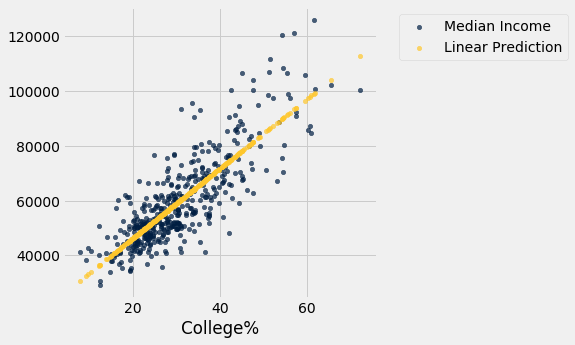

In [219]:
demographics = demographics.with_column(
    'Linear Prediction', predicted)
demographics.scatter('College%')

In [220]:
#find errors
actual = demographics.column('Median Income')
errors = actual-predicted

In [221]:
demographics.with_column('Error', errors)

Median Income,College%,Linear Prediction,Error
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


In [223]:
#mean of errors
round(np.mean(errors),6)

0.0

In [224]:
#rmse: root mean squared error
np.mean(errors ** 2) ** (1/2)

9398.515588571281

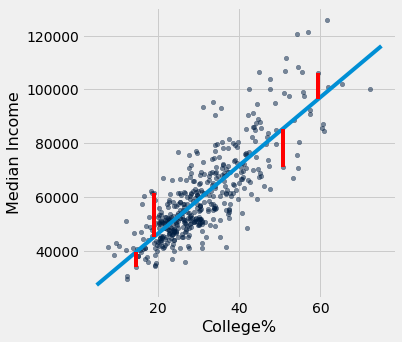

In [225]:
demographics_errors(regression_slope, regression_intercept)

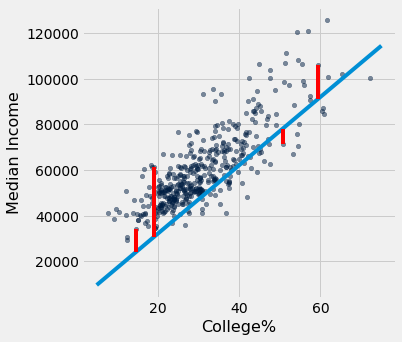

In [226]:
# we can look at some other lines
demographics_errors(1500, 2000)

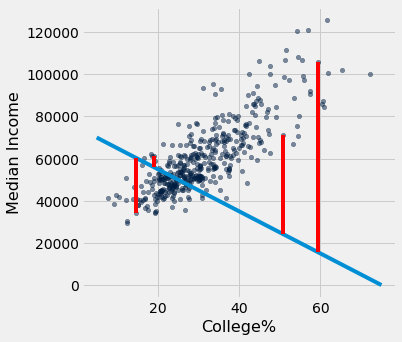

In [227]:
demographics_errors(-1000, 75000)

### Root Mean Square Error ###

In [228]:
def show_demographics_rmse(slope, intercept):
    demographics_errors(slope, intercept)
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", round(mse ** 0.5, 2))

Root mean squared error: 11559.09


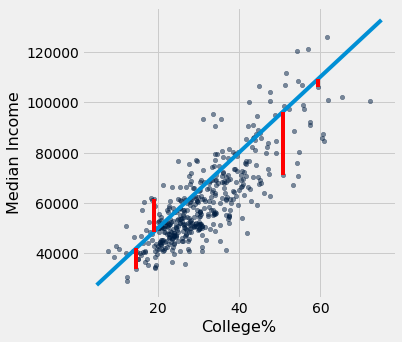

In [229]:
show_demographics_rmse(1500, 20000)

Root mean squared error: 30247.88


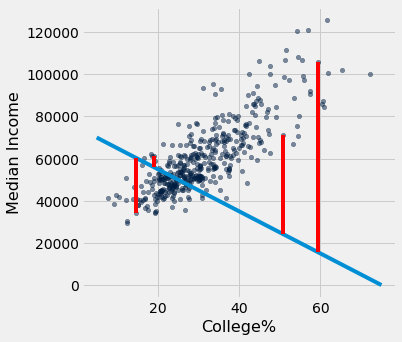

In [230]:
show_demographics_rmse(-1000, 75000)

Root mean squared error: 11559.09


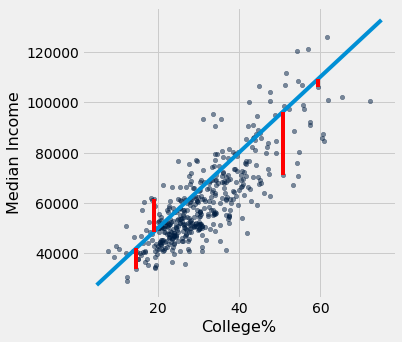

In [231]:
show_demographics_rmse(1500, 20000)

Root mean squared error: 9398.52


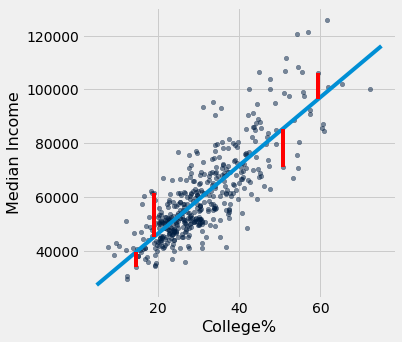

In [232]:
show_demographics_rmse(regression_slope, regression_intercept)

### Numerical Optimization ###

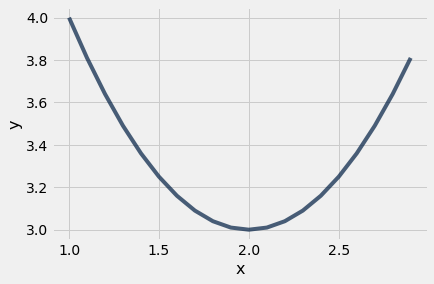

In [233]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [239]:
def f(x):
    return ((x-2)**2) + 3

In [240]:
minimize(f)

1.9999999946252267

In [236]:
f(minimize(f))

3.0

### Minimizing RMSE ###

In [241]:
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [242]:
demographics_rmse(1500, 20000)

11559.086490075999

In [243]:
demographics_rmse(-1000, 75000)

30247.883767944502

In [244]:
minimize(demographics_rmse)

array([ 1270.70168805, 20802.57933807])

In [245]:
make_array(regression_slope, regression_intercept)

array([ 1270.70168946, 20802.57776668])

## Residuals ## 

In [246]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [247]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [248]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [249]:
heights = heights.with_columns(
    'Fitted Value', fitted_values(heights, 'MidParent', 'Child'),
    'Residual', residuals(heights, 'MidParent', 'Child')
)
heights

MidParent,Child,Fitted Value,Residual
75.43,73.2,70.7124,2.48763
75.43,69.2,70.7124,-1.51237
75.43,69,70.7124,-1.71237
75.43,69,70.7124,-1.71237
73.66,73.5,69.5842,3.91576
73.66,72.5,69.5842,2.91576
73.66,65.5,69.5842,-4.08424
73.66,65.5,69.5842,-4.08424
72.06,71,68.5645,2.43553
72.06,68,68.5645,-0.564467


In [250]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

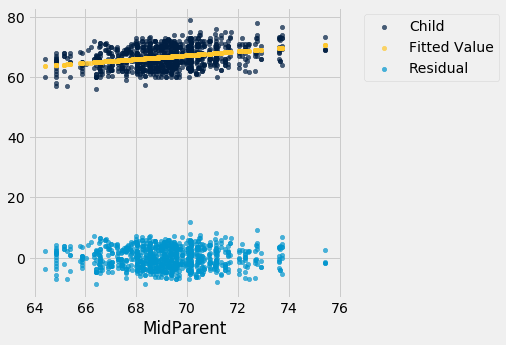

In [251]:
heights.scatter('MidParent')

In [252]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

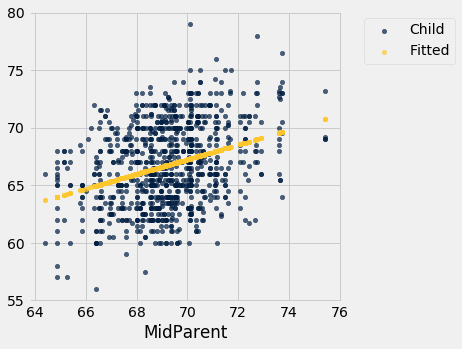

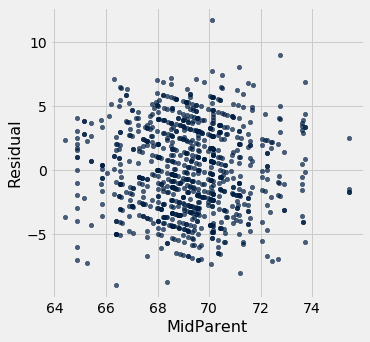

In [253]:
plot_residuals(heights, 'MidParent', 'Child')

## Diagnostics with Residuals ##

In [254]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


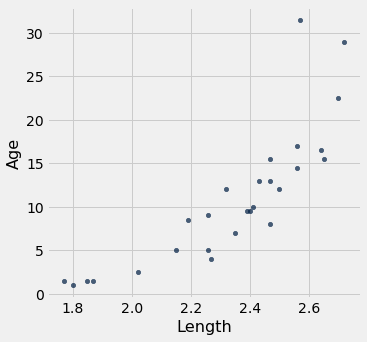

In [255]:
dugong.scatter('Length', 'Age')

In [256]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

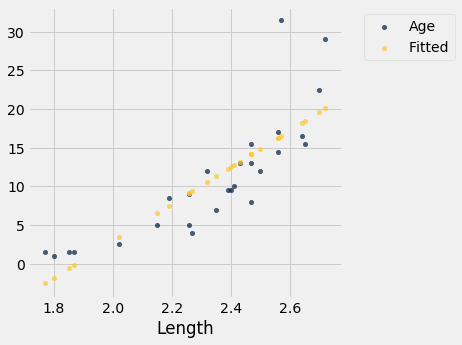

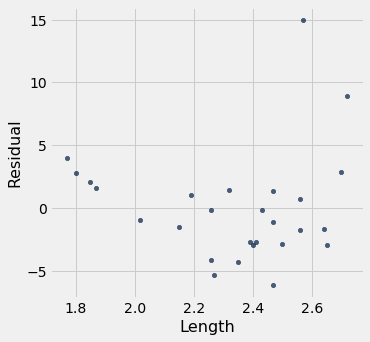

In [257]:
plot_residuals(dugong, 'Length', 'Age')

In [258]:
us_women = Table.read_table('us_women.csv')
us_women.show(5)

height,ave weight
58,115
59,117
60,120
61,123
62,126


In [259]:
correlation(us_women, 'height', 'ave weight')

0.9954947677842161

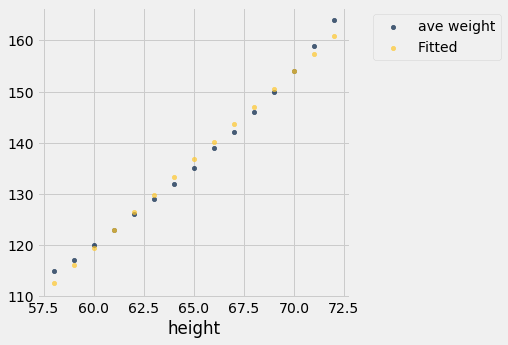

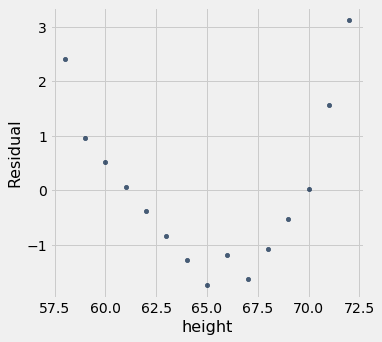

In [260]:
plot_residuals(us_women, 'height', 'ave weight')

In [261]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.show(5)

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3


In [262]:
correlation(demographics, 'Median Income', 'Percent voting for Clinton')

0.18350753861019928

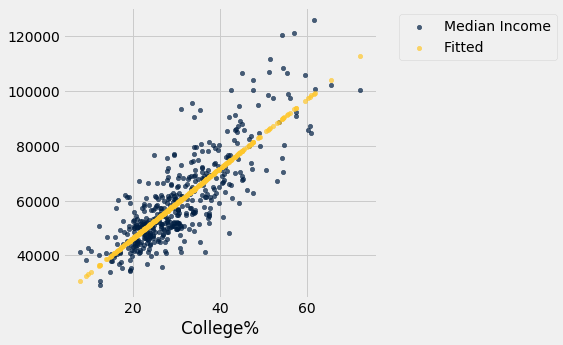

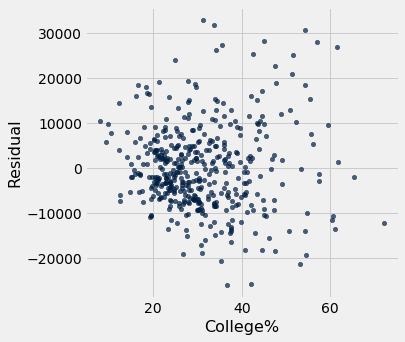

In [263]:
plot_residuals(demographics, 'College%', 'Median Income')

## Average of Residuals ##

In [266]:
#mean of residuals
round(np.average(residuals(dugong, 'Length', 'Age')), 10)

0.0

In [267]:
#mean of residuals
round(np.average(residuals(heights, 'MidParent', 'Child')), 6)

0.0

In [268]:
#mean of residuals
round(np.average(residuals(demographics, 'Median Income', 'Percent voting for Clinton')), 6)

-0.0

In [269]:
#correlation between x and residual
round(correlation(heights, 'MidParent', 'Residual'), 6)

-0.0

In [270]:
#correlation between fitted y and residual
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

-0.0

## A Measure of Clustering ##

In [271]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

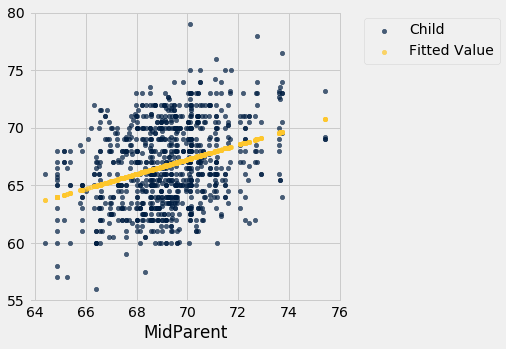

In [272]:
plot_fitted(heights, 'MidParent', 'Child')

In [273]:
child_predictions_sd = np.std(fitted_values(heights, 'MidParent', 'Child'))
child_observed_sd = np.std(heights.column('Child'))
print(child_predictions_sd)
print(child_observed_sd)

1.148145168378806
3.5773346010057634


In [274]:
child_predictions_sd / child_observed_sd

0.32094989606395957

In [275]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

In [276]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

In [277]:
dugong_prediction_sd = np.std(fitted_values(dugong, 'Length', 'Age'))
dugong_observed_sd = np.std(dugong.column('Age'))
dugong_prediction_sd / dugong_observed_sd

0.8296474554905713

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

## SD of the Residuals ##
No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

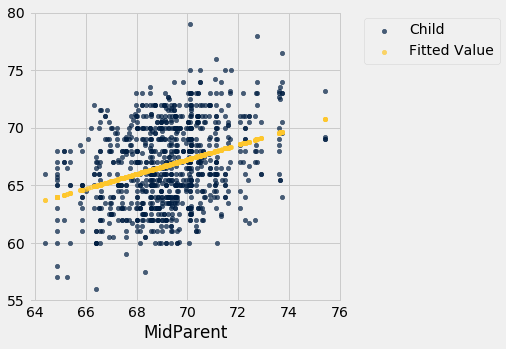

In [278]:
plot_fitted(heights, 'MidParent', 'Child')

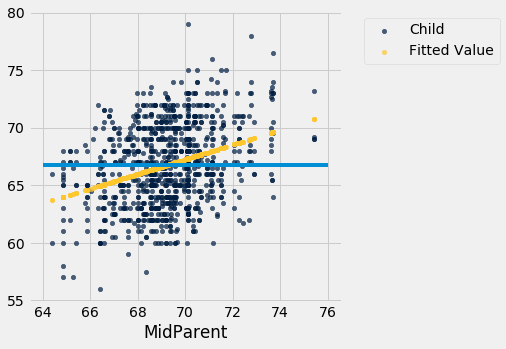

In [279]:
plot_fitted(heights, 'MidParent', 'Child')
ave_child = np.mean(heights.column('Child'))
plots.plot([64, 76], [ave_child, ave_child]);

In [280]:
#SD of y-values
np.std(heights.column('Child'))

3.5773346010057634

In [281]:
#SD of residuals
np.std(residuals(heights, 'MidParent', 'Child'))

3.3880799163953426

In [282]:
#SD of fitted values
np.std(heights.column('Fitted Value')) ** 2

1.3182373276715966

In [283]:
r = correlation(heights, 'MidParent', 'Child')
r

0.32094989606395924

In [284]:
#should equal SD of residuals
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

3.388079916395342

## Discussion Question ##

In [285]:
sd_residuals = 15*np.sqrt(1-0.6**2)

In [286]:
sd_residuals

12.0